In [41]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification

# Build a classification task using 3 informative features
X, y = make_classification(
    n_samples=1000,
    n_features=25,
    n_informative=3,
    n_redundant=2,
    n_repeated=0,
    n_classes=8,
    n_clusters_per_class=1,
    random_state=0,
)

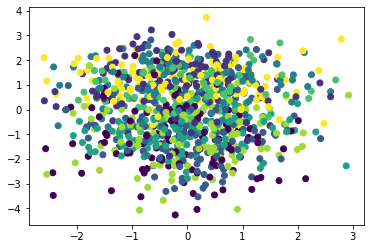

In [18]:
import matplotlib.pyplot as plt
plt.viridis()
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

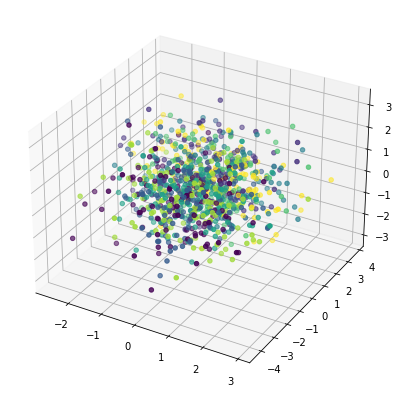

In [17]:
import matplotlib.pyplot as plt

# Creating figure
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(X[:, 0], X[:, 1], X[:, 2], c=y)
 
# show plot
plt.show()

### Pair Plot vs Correlação

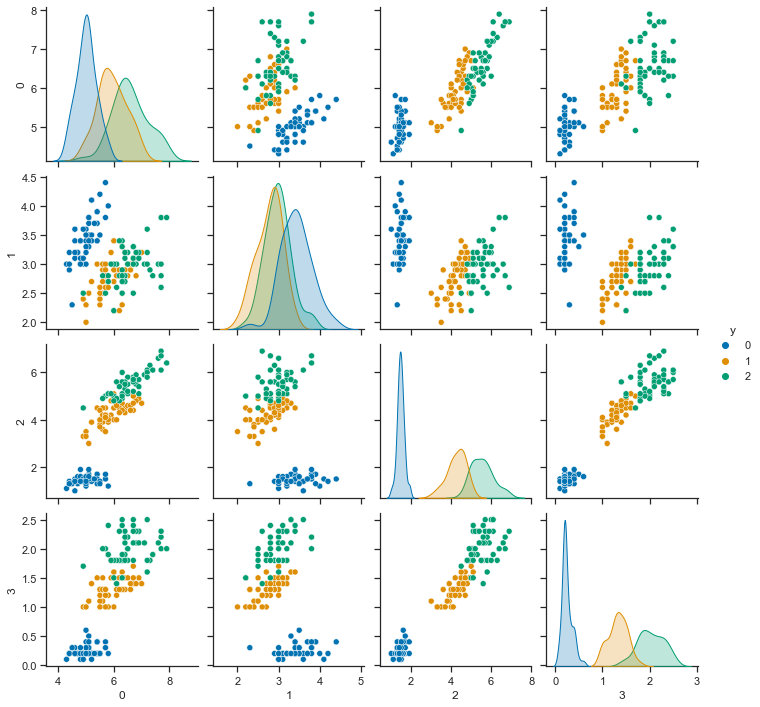

In [58]:
import pandas as pd
import seaborn as sns

from sklearn.datasets import load_iris
data_iris = load_iris()
X = data_iris.data
y = data_iris.target
#data = pd.DataFrame(X)
#data['y'] = y

data = pd.DataFrame(data_iris.data)
data['y'] = data_iris.target

sns.set(style="ticks")
sns.pairplot(data, hue='y', palette="colorblind")

       0    1    2    3  y
0    5.1  3.5  1.4  0.2  0
1    4.9  3.0  1.4  0.2  0
2    4.7  3.2  1.3  0.2  0
3    4.6  3.1  1.5  0.2  0
4    5.0  3.6  1.4  0.2  0
..   ...  ...  ...  ... ..
145  6.7  3.0  5.2  2.3  2
146  6.3  2.5  5.0  1.9  2
147  6.5  3.0  5.2  2.0  2
148  6.2  3.4  5.4  2.3  2
149  5.9  3.0  5.1  1.8  2

[150 rows x 5 columns]


<AxesSubplot:>

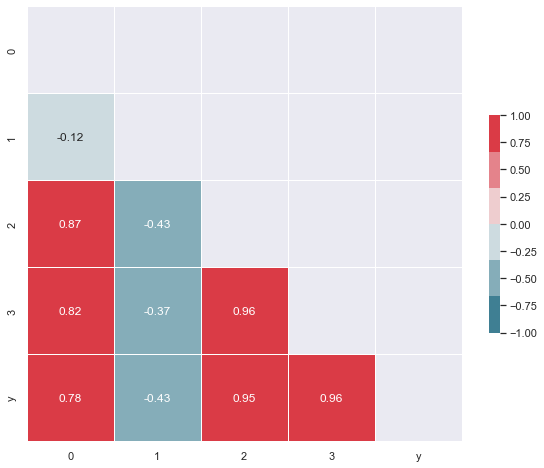

In [57]:
#method{‘pearson’, ‘kendall’, ‘spearman’}
corr = data.corr(method="pearson")

sns.set(style="darkgrid")

f, ax = plt.subplots(figsize=(10, 8))

mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)]=True

cmap = sns.diverging_palette(220, 10)

sns.heatmap(corr, mask=mask, annot=True, cmap=cmap,
            vmax=1, vmin=-1, center=0, square=True, 
            linewidth=.5,cbar_kws={"shrink":.5})

# Cross Correlation

In [4]:
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt
rng = np.random.default_rng()

In [5]:
sig = np.repeat([0., 1., 1., 0., 1., 0., 0., 1.], 128)
sig_noise = sig + rng.standard_normal(len(sig))
corr = signal.correlate(sig_noise, np.ones(128), mode='same') / 128

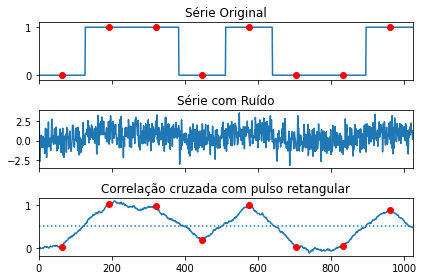

In [6]:
clock = np.arange(64, len(sig), 128)
fig, (ax_orig, ax_noise, ax_corr) = plt.subplots(3, 1, sharex=True)

ax_orig.plot(sig)
ax_orig.plot(clock, sig[clock], 'ro')
ax_orig.set_title('Série Original')

ax_noise.plot(sig_noise)
ax_noise.set_title('Série com Ruído')

ax_corr.plot(corr)
ax_corr.plot(clock, corr[clock], 'ro')
ax_corr.axhline(0.5, ls=':')
ax_corr.set_title('Correlação cruzada com pulso retangular')

ax_orig.margins(0, 0.1)

fig.tight_layout()
plt.show()

In [28]:
x = np.arange(128) / 128 #  amostra
sig = np.sin(2 * np.pi * x) # série
sig_noise = sig + rng.standard_normal(len(sig))/2 # série com ruído

corr = signal.correlate(sig_noise, sig)
lags = signal.correlation_lags(len(sig), len(sig_noise))
corr /= np.max(corr)

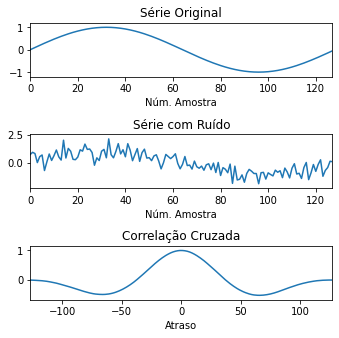

In [29]:
fig, (ax_orig, ax_noise, ax_corr) = plt.subplots(3, 1, figsize=(4.8, 4.8))

ax_orig.plot(sig)
ax_orig.set_title('Série Original')
ax_orig.set_xlabel('Núm. Amostra')

ax_noise.plot(sig_noise)
ax_noise.set_title('Série com Ruído')
ax_noise.set_xlabel('Núm. Amostra')

ax_corr.plot(lags, corr)
ax_corr.set_title('Correlação Cruzada')
ax_corr.set_xlabel('Atraso')

ax_orig.margins(0, 0.1)
ax_noise.margins(0, 0.1)
ax_corr.margins(0, 0.1)

fig.tight_layout()
plt.show()

# RFE - Recursive Feature Elimination

In [7]:
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
#svc = SVC(kernel="linear", max_iter=10000)

logreg = LogisticRegression(max_iter=1000)

#rfe = RFE(estimator, n_features_to_select=5, step=1)
#rfe.fit(X, y)

min_features_to_select = 1  # Minimum number of features to consider
rfecv = RFECV(
    estimator=logreg,
    step=1,
    cv=StratifiedKFold(2),
    scoring="accuracy",
    min_features_to_select=min_features_to_select
)
rfecv.fit(X, y)

print("Número ótimo de atributos : %d" % rfecv.n_features_)

Número ótimo de atributos : 7


In [8]:
# 1, 7, 8, 15, 16, 18, 22
rfecv.support_

array([False,  True, False, False, False, False, False,  True,  True,
       False, False, False, False, False, False,  True,  True, False,
        True, False, False, False,  True, False, False])

In [9]:
rfecv.ranking_

array([ 2,  1, 18, 13,  4,  5,  6,  1,  1, 12, 15,  7,  8, 10, 11,  1,  1,
       19,  1,  9, 16, 14,  1,  3, 17])

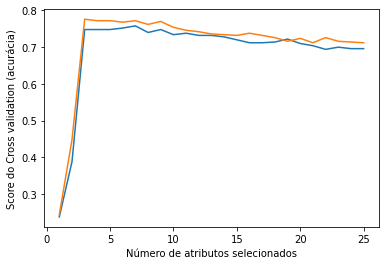

In [50]:
# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Número de atributos selecionados")
plt.ylabel("Score do Cross validation (acurácia)")

grid_scores_  = np.column_stack((rfecv.cv_results_['split0_test_score'], rfecv.cv_results_['split1_test_score']))
plt.plot(
    range(min_features_to_select, len(grid_scores_) + min_features_to_select),
    grid_scores_,
)
plt.show()

In [38]:
rfecv.support_

array([False,  True, False, False, False, False, False,  True,  True,
       False, False, False, False, False, False,  True,  True, False,
        True, False, False, False,  True, False, False])

In [39]:
rfecv.ranking_

array([ 2,  1, 18, 13,  4,  5,  6,  1,  1, 12, 15,  7,  8, 10, 11,  1,  1,
       19,  1,  9, 16, 14,  1,  3, 17])

In [19]:
sel_X = X[:,rfecv.support_]

In [36]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(sel_X,y, test_size=0.25)

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, Y_train)

print(lr.score(X_test, Y_test))

0.732


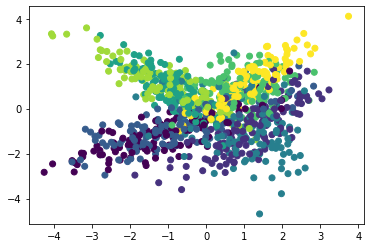

In [29]:
import matplotlib.pyplot as plt
plt.viridis()
plt.scatter(sel_X[:, 0], sel_X[:, 1], c=y)
plt.show()

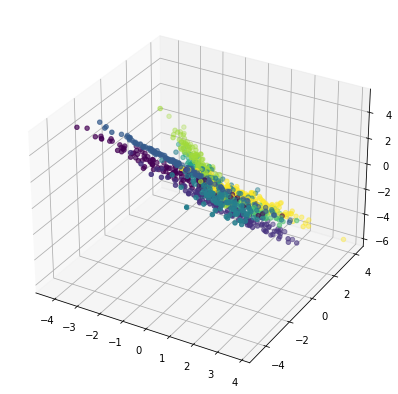

In [42]:
import matplotlib.pyplot as plt

# Creating figure
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(sel_X[:, 0], sel_X[:, 1], sel_X[:, 2], c=y)
 
# show plot
plt.show()

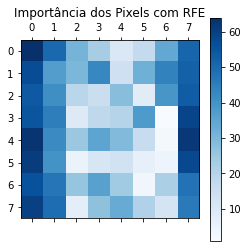

In [44]:
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt

# Load the digits dataset
digits = load_digits()
dX = digits.images.reshape((len(digits.images), -1))
dy = digits.target

# Create the RFE object and rank each pixel
svc = SVC(kernel="linear", C=1)
rfe = RFE(estimator=svc, n_features_to_select=1, step=1)
rfe.fit(dX, dy)
ranking = rfe.ranking_.reshape(digits.images[0].shape)

# Plot pixel ranking
plt.matshow(ranking, cmap=plt.cm.Blues)
plt.colorbar()
plt.title("Importância dos Pixels com RFE")
plt.show()

# MRMR

In [74]:
#https://github.com/danielhomola/mifs
import mifs

# define MI_FS feature selection method
#'JMI' : Joint Mutual Information [1]
#'JMIM' : Joint Mutual Information Maximisation [2]
#'MRMR' : Max-Relevance Min-Redundancy [3]
feat_selector = mifs.MutualInformationFeatureSelector(method='MRMR',n_features=3)

# find all relevant features
data = load_wine()
#feat_selector.fit(X, y)
feat_selector.fit(data.data, data.target)

# check selected features
feat_selector._support_mask

# check ranking of features
feat_selector.ranking_

# call transform() on X to filter it down to selected features
#X_filtered = feat_selector.transform(X)
X_filtered = feat_selector.transform(data.data)

In [75]:
feat_selector._support_mask

array([False, False, False, False, False, False,  True, False, False,
        True, False, False, False])

In [88]:
#sel_X = X[:,feat_selector._support_mask]
sel_X = data.data[:,feat_selector._support_mask]

from sklearn.model_selection import train_test_split

#X_train, X_test, Y_train, Y_test = train_test_split(sel_X,y, test_size=0.25)
X_train, X_test, Y_train, Y_test = train_test_split(sel_X,data.target, test_size=0.25)

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, Y_train)

print(lr.score(X_test, Y_test))

0.9333333333333333


In [86]:
feat_selector.ranking_

[6, 9]

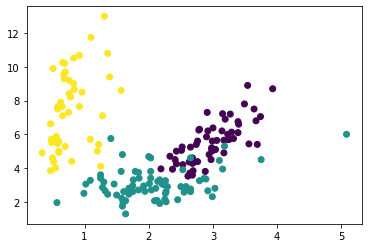

In [79]:
import matplotlib.pyplot as plt
plt.viridis()
plt.scatter(data.data[:, feat_selector.ranking_[0]],data.data[:, feat_selector.ranking_[1]], c=data.target)
plt.show()

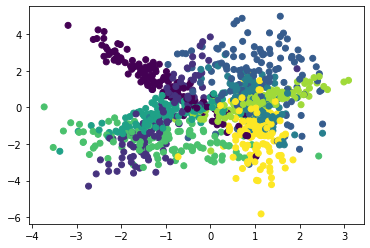

In [47]:
import matplotlib.pyplot as plt
plt.viridis()
plt.scatter(X[:, feat_selector.ranking_[0]],X[:, feat_selector.ranking_[1]], c=y)
plt.show()

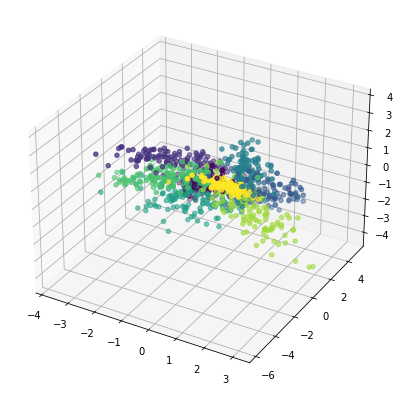

In [48]:
import matplotlib.pyplot as plt

# Creating figure
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(X[:, feat_selector.ranking_[0]],X[:, feat_selector.ranking_[1]],X[:, feat_selector.ranking_[2]], c=y)
 
# show plot
plt.show()

In [57]:
len(X_filtered[0])

12

In [82]:
import pandas as pd
from mrmr import mrmr_classif

selected_features = mrmr_classif(pd.DataFrame(X), pd.Series(y), K = 10)
print(selected_features)

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 43.60it/s]

[18, 3, 1, 7, 22, 8, 15, 10, 16, 11]


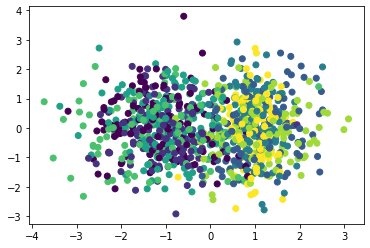

In [83]:
import matplotlib.pyplot as plt
plt.viridis()
plt.scatter(X[:, 18],X[:, 3], c=y)
plt.show()

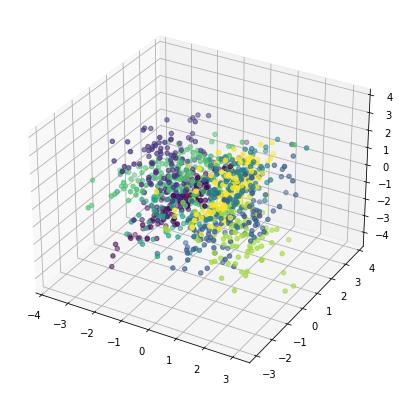

In [84]:
import matplotlib.pyplot as plt

# Creating figure
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(X[:, 18], X[:, 3], X[:, 1], c=y)
 
# show plot
plt.show()

# CBFS - Correlation-Based Feature Selection

In [60]:
import scipy.spatial as ss
from scipy.special import digamma
from math import log
import numpy.random as nr
import numpy as np
import random


# continuous estimators

def entropy(x, k=3, base=2):
    """
    The classic K-L k-nearest neighbor continuous entropy estimator x should be a list of vectors,
    e.g. x = [[1.3],[3.7],[5.1],[2.4]] if x is a one-dimensional scalar and we have four samples
    """

    assert k <= len(x)-1, "Set k smaller than num. samples - 1"
    d = len(x[0])
    N = len(x)
    intens = 1e-10  # small noise to break degeneracy, see doc.
    x = [list(p + intens * nr.rand(len(x[0]))) for p in x]
    tree = ss.cKDTree(x)
    nn = [tree.query(point, k+1, p=float('inf'))[0][k] for point in x]
    const = digamma(N)-digamma(k) + d*log(2)
    return (const + d*np.mean(map(log, nn)))/log(base)


def mi(x, y, k=3, base=2):
    """
    Mutual information of x and y; x, y should be a list of vectors, e.g. x = [[1.3],[3.7],[5.1],[2.4]]
    if x is a one-dimensional scalar and we have four samples
    """

    assert len(x) == len(y), "Lists should have same length"
    assert k <= len(x) - 1, "Set k smaller than num. samples - 1"
    intens = 1e-10  # small noise to break degeneracy, see doc.
    x = [list(p + intens * nr.rand(len(x[0]))) for p in x]
    y = [list(p + intens * nr.rand(len(y[0]))) for p in y]
    points = zip2(x, y)
    # Find nearest neighbors in joint space, p=inf means max-norm
    tree = ss.cKDTree(points)
    dvec = [tree.query(point, k+1, p=float('inf'))[0][k] for point in points]
    a, b, c, d = avgdigamma(x, dvec), avgdigamma(y, dvec), digamma(k), digamma(len(x))
    return (-a-b+c+d)/log(base)


def cmi(x, y, z, k=3, base=2):
    """
    Mutual information of x and y, conditioned on z; x, y, z should be a list of vectors, e.g. x = [[1.3],[3.7],[5.1],[2.4]]
    if x is a one-dimensional scalar and we have four samples
    """

    assert len(x) == len(y), "Lists should have same length"
    assert k <= len(x) - 1, "Set k smaller than num. samples - 1"
    intens = 1e-10  # small noise to break degeneracy, see doc.
    x = [list(p + intens * nr.rand(len(x[0]))) for p in x]
    y = [list(p + intens * nr.rand(len(y[0]))) for p in y]
    z = [list(p + intens * nr.rand(len(z[0]))) for p in z]
    points = zip2(x, y, z)
    # Find nearest neighbors in joint space, p=inf means max-norm
    tree = ss.cKDTree(points)
    dvec = [tree.query(point, k+1, p=float('inf'))[0][k] for point in points]
    a, b, c, d = avgdigamma(zip2(x, z), dvec), avgdigamma(zip2(y, z), dvec), avgdigamma(z, dvec), digamma(k)
    return (-a-b+c+d)/log(base)


def kldiv(x, xp, k=3, base=2):
    """
    KL Divergence between p and q for x~p(x), xp~q(x); x, xp should be a list of vectors, e.g. x = [[1.3],[3.7],[5.1],[2.4]]
    if x is a one-dimensional scalar and we have four samples
    """

    assert k <= len(x) - 1, "Set k smaller than num. samples - 1"
    assert k <= len(xp) - 1, "Set k smaller than num. samples - 1"
    assert len(x[0]) == len(xp[0]), "Two distributions must have same dim."
    d = len(x[0])
    n = len(x)
    m = len(xp)
    const = log(m) - log(n-1)
    tree = ss.cKDTree(x)
    treep = ss.cKDTree(xp)
    nn = [tree.query(point, k+1, p=float('inf'))[0][k] for point in x]
    nnp = [treep.query(point, k, p=float('inf'))[0][k-1] for point in x]
    return (const + d*np.mean(map(log, nnp))-d*np.mean(map(log, nn)))/log(base)


# Discrete estimators
def entropyd(sx, base=2):
    """
    Discrete entropy estimator given a list of samples which can be any hashable object
    """

    return entropyfromprobs(hist(sx), base=base)


def midd(x, y):
    """
    Discrete mutual information estimator given a list of samples which can be any hashable object
    """

    return -entropyd(list(zip(x, y)))+entropyd(x)+entropyd(y)


def cmidd(x, y, z):
    """
    Discrete mutual information estimator given a list of samples which can be any hashable object
    """

    return entropyd(list(zip(y, z)))+entropyd(list(zip(x, z)))-entropyd(list(zip(x, y, z)))-entropyd(z)


def hist(sx):
    # Histogram from list of samples
    d = dict()
    for s in sx:
        d[s] = d.get(s, 0) + 1
    return map(lambda z: float(z)/len(sx), d.values())


def entropyfromprobs(probs, base=2):
    # Turn a normalized list of probabilities of discrete outcomes into entropy (base 2)
    return -sum(map(elog, probs))/log(base)


def elog(x):
    # for entropy, 0 log 0 = 0. but we get an error for putting log 0
    if x <= 0. or x >= 1.:
        return 0
    else:
        return x*log(x)


# Mixed estimators
def micd(x, y, k=3, base=2, warning=True):
    """ If x is continuous and y is discrete, compute mutual information
    """

    overallentropy = entropy(x, k, base)
    n = len(y)
    word_dict = dict()
    for sample in y:
        word_dict[sample] = word_dict.get(sample, 0) + 1./n
    yvals = list(set(word_dict.keys()))

    mi = overallentropy
    for yval in yvals:
        xgiveny = [x[i] for i in range(n) if y[i] == yval]
        if k <= len(xgiveny) - 1:
            mi -= word_dict[yval]*entropy(xgiveny, k, base)
        else:
            if warning:
                print("Warning, after conditioning, on y={0} insufficient data. Assuming maximal entropy in this case.".format(yval))
            mi -= word_dict[yval]*overallentropy
    return mi  # units already applied


# Utility functions
def vectorize(scalarlist):
    """
    Turn a list of scalars into a list of one-d vectors
    """

    return [(x,) for x in scalarlist]


def shuffle_test(measure, x, y, z=False, ns=200, ci=0.95, **kwargs):
    """
    Shuffle test
    Repeatedly shuffle the x-values and then estimate measure(x,y,[z]).
    Returns the mean and conf. interval ('ci=0.95' default) over 'ns' runs, 'measure' could me mi,cmi,
    e.g. Keyword arguments can be passed. Mutual information and CMI should have a mean near zero.
    """

    xp = x[:]   # A copy that we can shuffle
    outputs = []
    for i in range(ns):
        random.shuffle(xp)
        if z:
            outputs.append(measure(xp, y, z, **kwargs))
        else:
            outputs.append(measure(xp, y, **kwargs))
    outputs.sort()
    return np.mean(outputs), (outputs[int((1.-ci)/2*ns)], outputs[int((1.+ci)/2*ns)])


# Internal functions
def avgdigamma(points, dvec):
    # This part finds number of neighbors in some radius in the marginal space
    # returns expectation value of <psi(nx)>
    N = len(points)
    tree = ss.cKDTree(points)
    avg = 0.
    for i in range(N):
        dist = dvec[i]
        # subtlety, we don't include the boundary point,
        # but we are implicitly adding 1 to kraskov def bc center point is included
        num_points = len(tree.query_ball_point(points[i], dist-1e-15, p=float('inf')))
        avg += digamma(num_points)/N
    return avg


def zip2(*args):
    # zip2(x,y) takes the lists of vectors and makes it a list of vectors in a joint space
    # E.g. zip2([[1],[2],[3]],[[4],[5],[6]]) = [[1,4],[2,5],[3,6]]
    return [sum(sublist, []) for sublist in zip(*args)]

In [61]:
def information_gain(f1, f2):
    """
    This function calculates the information gain, where ig(f1, f2) = H(f1) - H(f1\f2)
    :param f1: {numpy array}, shape (n_samples,)
    :param f2: {numpy array}, shape (n_samples,)
    :return: ig: {float}
    """

    ig = entropyd(f1) - conditional_entropy(f1, f2)
    return ig


def conditional_entropy(f1, f2):
    """
    This function calculates the conditional entropy, where ce = H(f1) - I(f1;f2)
    :param f1: {numpy array}, shape (n_samples,)
    :param f2: {numpy array}, shape (n_samples,)
    :return: ce {float} conditional entropy of f1 and f2
    """

    ce = entropyd(f1) - midd(f1, f2)
    return ce


def su_calculation(f1, f2):
    """
    This function calculates the symmetrical uncertainty, where su(f1,f2) = 2*IG(f1,f2)/(H(f1)+H(f2))
    :param f1: {numpy array}, shape (n_samples,)
    :param f2: {numpy array}, shape (n_samples,)
    :return: su {float} su is the symmetrical uncertainty of f1 and f2
    """
    # calculate information gain of f1 and f2, t1 = ig(f1, f2)
    t1 = information_gain(f1, f2)
    # calculate entropy of f1
    t2 = entropyd(f1)
    # calculate entropy of f2
    t3 = entropyd(f2)

    su = 2.0 * t1 / (t2 + t3)

    return su

In [62]:

def merit_calculation(X, y):
    """
    This function calculates the merit of X given class labels y, where
    merits = (k * rcf) / sqrt (k + k*(k-1)*rff)
    rcf = (1/k)*sum(su(fi, y)) for all fi in X
    rff = (1/(k*(k-1)))*sum(su(fi, fj)) for all fi and fj in X
    :param X:  {numpy array}, shape (n_samples, n_features) input data
    :param y:  {numpy array}, shape (n_samples) input class labels
    :return merits: {float}  merit of a feature subset X
    """

    n_samples, n_features = X.shape
    rff = 0
    rcf = 0
    for i in range(n_features):
        fi = X[:, i]
        rcf += su_calculation(fi, y)  # su is the symmetrical uncertainty of fi and y
        for j in range(n_features):
            if j > i:
                fj = X[:, j]
                rff += su_calculation(fi, fj)
    rff *= 2
    merits = rcf / np.sqrt(n_features + rff)
    return merits


def cfs(X, y):
    """
    This function uses a correlation based heuristic to evaluate the worth of features which is called CFS
    :param X: {numpy array}, shape (n_samples, n_features) input data
    :param y: {numpy array}, shape (n_samples) input class labels
    :return F: {numpy array}, index of selected features
    """

    n_samples, n_features = X.shape
    F = []
    M = []  # M stores the merit values
    while True:
        merit = -100000000000
        idx = -1
        for i in range(n_features):
            if i not in F:
                F.append(i)
                # calculate the merit of current selected features
                t = merit_calculation(X[:, F], y)
                if t > merit:
                    merit = t
                    idx = i
                F.pop()
        F.append(idx)
        M.append(merit)
        if len(M) > 5:
            if M[len(M)-1] <=M[len(M)-2]:
                if M[len(M)-2] <= M[len(M)-3]:
                    if M[len(M)-3] <= M[len(M)-4]:
                        if M[len(M)-4] <= M[len(M)-5]:
                            break
    return np.array(F), np.array(M)

In [63]:
from sklearn.datasets import load_wine
data = load_wine()

In [68]:
_cfs, _ = cfs(data.data,data.target)
#_cfs, _ = cfs(X,y)
print(_cfs)

[ 6 11  9  0 12  5  1 10]


In [98]:
#sel_X = X[:,feat_selector._support_mask]
sel_X = data.data[:,_cfs]

from sklearn.model_selection import train_test_split

#X_train, X_test, Y_train, Y_test = train_test_split(sel_X,y, test_size=0.25)
X_train, X_test, Y_train, Y_test = train_test_split(sel_X,data.target, test_size=0.25)

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=5000)
lr.fit(X_train, Y_train)

print(lr.score(X_test, Y_test))

0.9555555555555556


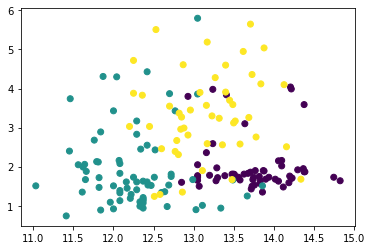

In [69]:
import matplotlib.pyplot as plt
plt.viridis()
plt.scatter(data.data[:, 0], data.data[:,  1], c=data.target)
plt.show()

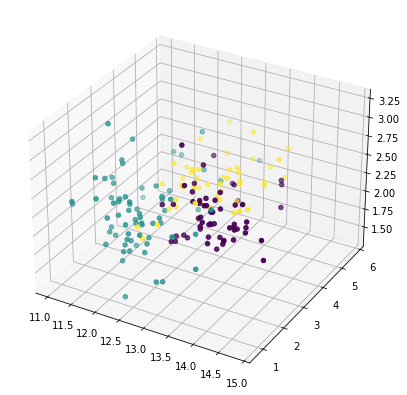

In [70]:
import matplotlib.pyplot as plt

# Creating figure
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(data.data[:, 0], data.data[:,  1], data.data[:,  2], c=data.target)

# show plot
plt.show()

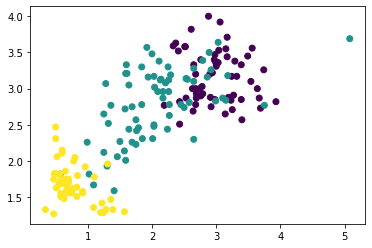

In [71]:
import matplotlib.pyplot as plt
plt.viridis()
plt.scatter(data.data[:, _cfs[0]], data.data[:,  _cfs[1]], c=data.target)
plt.show()

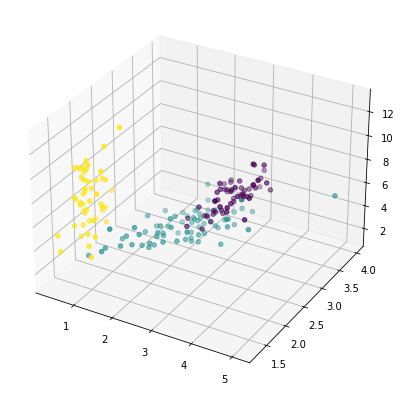

In [72]:
import matplotlib.pyplot as plt

# Creating figure
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(data.data[:, _cfs[0]], data.data[:,  _cfs[1]], data.data[:,  _cfs[2]], c=data.target)

# show plot
plt.show()

# Relief-F

In [104]:
#pip install sklearn_relief
import sklearn_relief as relief

#Relief, ReliefF, RReliefF
fs = relief.ReliefF(n_features=3)
X_relief = fs.fit_transform(data.data, data.target)

print("(No. of tuples, No. of Columns before ReliefF) : "+str(data.data.shape)+ "\n(No. of tuples, No. of Columns after ReliefF) : "+str(X_train.shape))

(No. of tuples, No. of Columns before ReliefF) : (178, 13)
(No. of tuples, No. of Columns after ReliefF) : (133, 3)


In [118]:
#sel_X = X[:,feat_selector._support_mask]
sel_X = data.data[:,_cfs]

from sklearn.model_selection import train_test_split

#X_train, X_test, Y_train, Y_test = train_test_split(sel_X,y, test_size=0.25)
X_train, X_test, Y_train, Y_test = train_test_split(data.data,data.target, test_size=0.25)

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=5000)
lr.fit(X_train, Y_train)

print(lr.score(X_test, Y_test))

0.9111111111111111


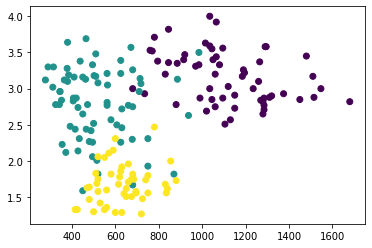

In [101]:
import matplotlib.pyplot as plt
plt.viridis()
plt.scatter(X_train[:, 0], X_train[:,  1], c=data.target)
plt.show()

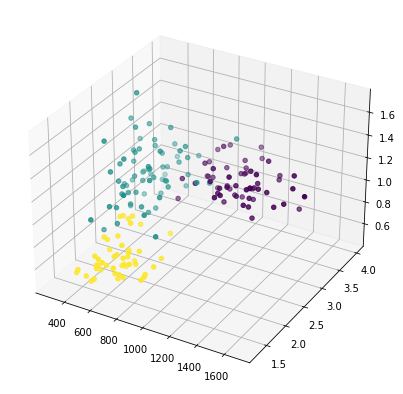

In [102]:
import matplotlib.pyplot as plt

# Creating figure
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(X_train[:, 0], X_train[:,  1], X_train[:,  2], c=data.target)

# show plot
plt.show()

In [24]:
from scipy.stats import chi2_contingency
stat, p, dof, expected = chi2_contingency(data.data)

In [28]:
df = data.data

In [37]:
df

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [36]:
#----------step 1: Extract required columns, ideally it should be two columns at a time
data_interim=df[[0,5]]
#----------step 2: Create a cross tab which is a contigency table
data_cont=pd.crosstab(data_interim[0], data_interim[5])
data_cont
from scipy.stats import chi2_contingency
stat, p, dof, expected = chi2_contingency(data_cont)
#-----------interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    
    print('Dependent (reject H0)')
    
else:
    print('Independent (H0 holds true)')

IndexError: index 5 is out of bounds for axis 0 with size 2

### Chi^2

In [21]:

from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

test = SelectKBest(score_func=chi2, k=3)
fit = test.fit(data.data,data.target)

X_new=test.fit_transform(data.data,data.target)

fit.scores_

array([5.44549882e+00, 2.80686046e+01, 7.43380598e-01, 2.93836955e+01,
       4.50263809e+01, 1.56230759e+01, 6.33343081e+01, 1.81548480e+00,
       9.36828307e+00, 1.09016647e+02, 5.18253981e+00, 2.33898834e+01,
       1.65400671e+04])

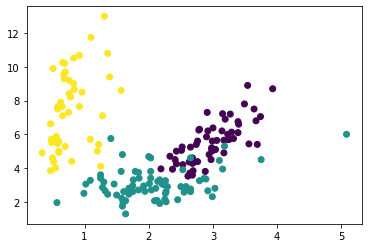

In [22]:
import matplotlib.pyplot as plt
plt.viridis()
plt.scatter(X_new[:, 0], X_new[:,  1], c=data.target)
plt.show()

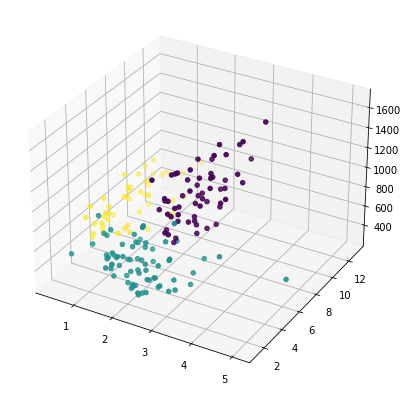

In [23]:
import matplotlib.pyplot as plt

# Creating figure
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(X_new[:, 0], X_new[:,  1], X_new[:,  2], c=data.target)

# show plot
plt.show()

# PCA - Principal Component Analysis

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

# Build a classification task using 3 informative features
X, y = make_classification(
    n_samples=1000,
    n_features=25,
    n_informative=3,
    n_redundant=12,
    n_repeated=0,
    n_classes=8,
    n_clusters_per_class=1,
    random_state=0,
)

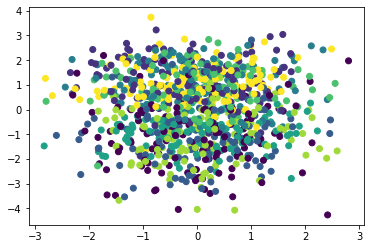

In [7]:
import matplotlib.pyplot as plt
plt.viridis()
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

#X_digits, y_digits = datasets.load_digits(return_X_y=True)

pca = PCA()

scaler = StandardScaler() # Define a Standard Scaler to normalize inputs

# set the tolerance to a large value to make the example faster
logistic = LogisticRegression(max_iter=10000, tol=0.1)

pipe = Pipeline(steps=[("scaler", scaler), ("pca", pca), ("logistic", logistic)])



In [9]:
# Parameters of pipelines can be set using '__' separated parameter names:
param_grid = {
    #"pca__n_components": [5, 15, 30, 45, 60],
    "pca__n_components": [3,5,7,10,15,17,18,19,20,21,22,23,24,25],
    "logistic__C": np.logspace(-4, 4, 4),
}

search = GridSearchCV(pipe, param_grid, n_jobs=2)
search.fit(X, y)

print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

#0.732

Best parameter (CV score=0.765):
{'logistic__C': 21.54434690031882, 'pca__n_components': 3}


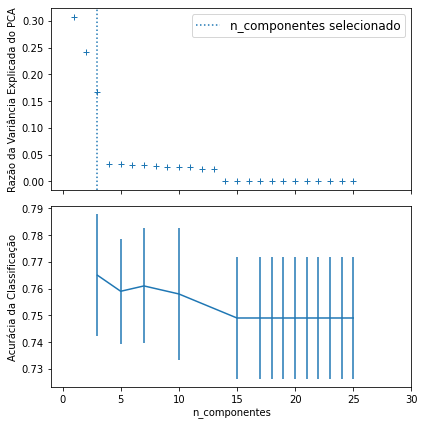

In [10]:
# Plot the PCA spectrum
pca.fit(X)

fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True, figsize=(6, 6))
ax0.plot(
    np.arange(1, pca.n_components_ + 1), pca.explained_variance_ratio_, "+", linewidth=2
)
ax0.set_ylabel("Razão da Variância Explicada do PCA")

ax0.axvline(
    search.best_estimator_.named_steps["pca"].n_components,
    linestyle=":",
    label="n_componentes selecionado",
)
ax0.legend(prop=dict(size=12))

# For each number of components, find the best classifier results
results = pd.DataFrame(search.cv_results_)
components_col = "param_pca__n_components"
best_clfs = results.groupby(components_col).apply(
    lambda g: g.nlargest(1, "mean_test_score")
)

best_clfs.plot(
    x=components_col, y="mean_test_score", yerr="std_test_score", legend=False, ax=ax1
)
ax1.set_ylabel("Acurácia da Classificação")
ax1.set_xlabel("n_componentes")

plt.xlim(-1, 30)

plt.tight_layout()
plt.show()

In [11]:
#print(pca.explained_variance_)
#print(pca.components_[0])
for c in pca.components_:
    print(np.argmax(c))

14
21
24
20
0
22
16
13
19
19
11
11
11
18
3
15
18
9
23
8
15
10
14
6
10


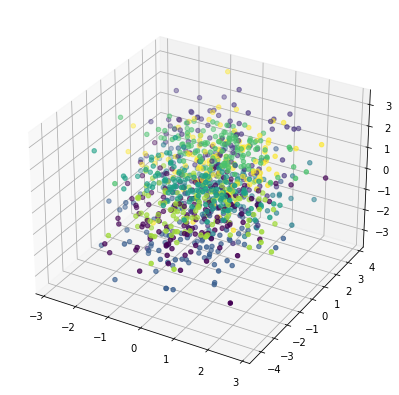

In [12]:
import matplotlib.pyplot as plt

# Creating figure
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(X[:, 0], X[:, 1], X[:, 2], c=y)
 
# show plot
plt.show()

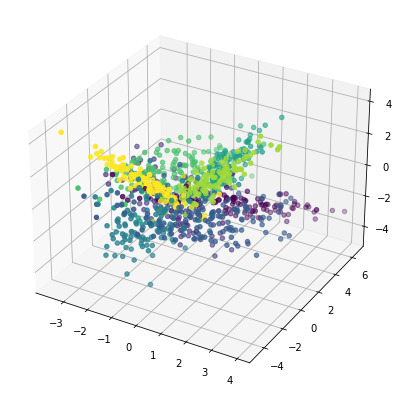

In [13]:
import matplotlib.pyplot as plt

# Creating figure
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(X[:, 14], X[:, 21], X[:, 24], c=y)
 
# show plot
plt.show()

In [14]:
sel_X = pca.transform(X)

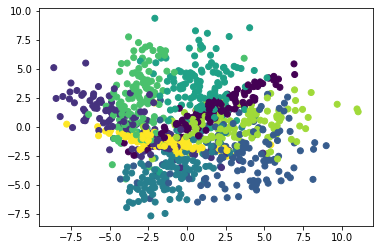

In [16]:
import matplotlib.pyplot as plt
plt.viridis()
plt.scatter(sel_X[:, 0], sel_X[:, 1], c=y)
plt.show()

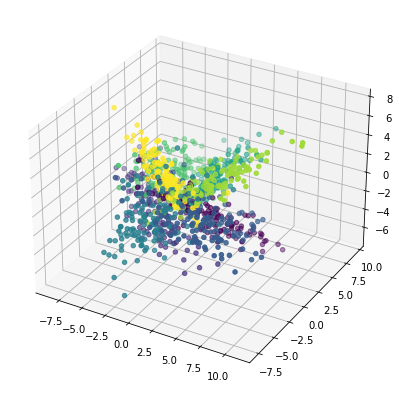

In [17]:
import matplotlib.pyplot as plt

# Creating figure
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(sel_X[:, 0], sel_X[:, 1], sel_X[:, 2], c=y)
 
# show plot
plt.show()

### Exemplo 2 PCA:

In [23]:
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_wine
from sklearn.pipeline import make_pipeline

# Code source: Tyler Lanigan <tylerlanigan@gmail.com>
#              Sebastian Raschka <mail@sebastianraschka.com>

# License: BSD 3 clause

RANDOM_STATE = 42
FIG_SIZE = (10, 7)

features, target = load_wine(return_X_y=True)

# Make a train/test split using 30% test size
X_train, X_test, y_train, y_test = train_test_split(
    features, target, test_size=0.30, random_state=RANDOM_STATE
)

# Fit to data and predict using pipelined GNB and PCA
#unscaled_clf = make_pipeline(PCA(n_components=2), GaussianNB())
unscaled_clf = make_pipeline(PCA(n_components=2), LogisticRegression(max_iter=10000, tol=0.1))
unscaled_clf.fit(X_train, y_train)
pred_test = unscaled_clf.predict(X_test)

# Fit to data and predict using pipelined scaling, GNB and PCA
#std_clf = make_pipeline(StandardScaler(), PCA(n_components=2), GaussianNB())
std_clf = make_pipeline(StandardScaler(), PCA(n_components=2), LogisticRegression(max_iter=10000, tol=0.1))
std_clf.fit(X_train, y_train)
pred_test_std = std_clf.predict(X_test)

# Show prediction accuracies in scaled and unscaled data.
print("\nPrediction accuracy for the normal test dataset with PCA")
print(f"{accuracy_score(y_test, pred_test):.2%}\n")

print("\nPrediction accuracy for the standardized test dataset with PCA")
print(f"{accuracy_score(y_test, pred_test_std):.2%}\n")

# Extract PCA from pipeline
pca = unscaled_clf.named_steps["pca"]
pca_std = std_clf.named_steps["pca"]

# Show first principal components
print(f"\nPC 1 without scaling:\n{pca.components_[0]}")
print(f"\nPC 1 with scaling:\n{pca_std.components_[0]}")

# Use PCA without and with scale on X_train data for visualization.
X_train_transformed = pca.transform(X_train)

scaler = std_clf.named_steps["standardscaler"]
scaled_X_train = scaler.transform(X_train)
X_train_std_transformed = pca_std.transform(scaled_X_train)




Prediction accuracy for the normal test dataset with PCA
68.52%


Prediction accuracy for the standardized test dataset with PCA
96.30%


PC 1 without scaling:
[ 1.76342917e-03 -8.35544737e-04  1.54623496e-04 -5.31136096e-03
  2.01663336e-02  1.02440667e-03  1.53155502e-03 -1.11663562e-04
  6.31071580e-04  2.32645551e-03  1.53606718e-04  7.43176482e-04
  9.99775716e-01]

PC 1 with scaling:
[ 0.13443023 -0.25680248 -0.0113463  -0.23405337  0.15840049  0.39194918
  0.41607649 -0.27871336  0.33129255 -0.11383282  0.29726413  0.38054255
  0.27507157]


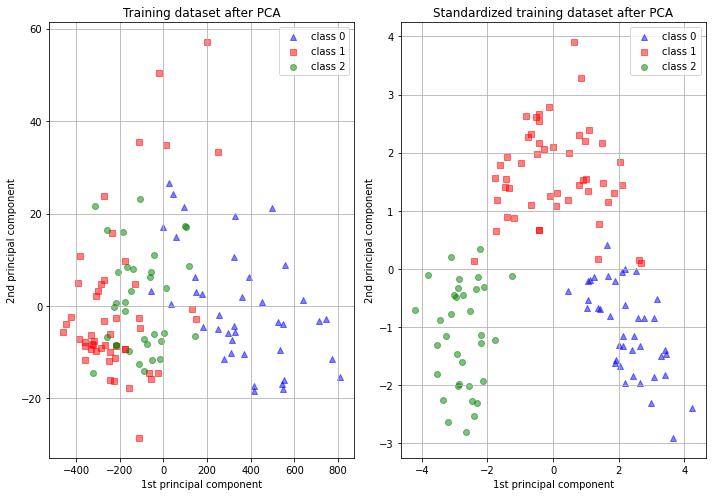

In [25]:
# visualize standardized vs. untouched dataset with PCA performed
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=FIG_SIZE)

target_classes = range(0, 3)
colors = ("blue", "red", "green")
markers = ("^", "s", "o")

for target_class, color, marker in zip(target_classes, colors, markers):
    ax1.scatter(
        x=X_train_transformed[y_train == target_class, 0],
        y=X_train_transformed[y_train == target_class, 1],
        color=color,
        label=f"class {target_class}",
        alpha=0.5,
        marker=marker,
    )

    ax2.scatter(
        x=X_train_std_transformed[y_train == target_class, 0],
        y=X_train_std_transformed[y_train == target_class, 1],
        color=color,
        label=f"class {target_class}",
        alpha=0.5,
        marker=marker,
    )

ax1.set_title("Training dataset after PCA")
ax2.set_title("Standardized training dataset after PCA")

for ax in (ax1, ax2):
    ax.set_xlabel("1st principal component")
    ax.set_ylabel("2nd principal component")
    ax.legend(loc="upper right")
    ax.grid()

plt.tight_layout()

plt.show()

### Exemplo 3 PCA MNIST:

In [26]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA

digits = load_digits()

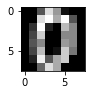

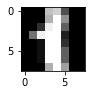

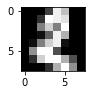

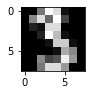

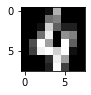

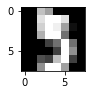

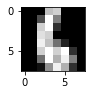

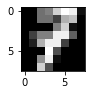

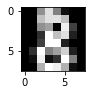

In [27]:
from matplotlib import pyplot

X_train = digits.data

for i in range(9):  
    pyplot.subplot(330 + 1 + i)
    shape = (8,8)
    im = X_train[i].reshape(shape)
    pyplot.imshow(im, cmap=pyplot.get_cmap('gray'))
    pyplot.show()    

In [39]:
pca = PCA(n_components=36, whiten=True)
X_pca = pca.fit_transform(digits.data / 255)

In [40]:
print(pca.explained_variance_ratio_)

[0.14890594 0.13618771 0.11794594 0.08409979 0.05782414 0.04916782
 0.04315966 0.03661352 0.03352825]


ValueError: cannot reshape array of size 9 into shape (6,6)

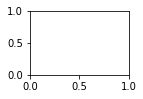

In [57]:
from matplotlib import pyplot

X_train = X_pca

for i in range(9):  
    pyplot.subplot(330 + 1 + i)
    shape = (6,6)
    im = X_train[i].reshape(shape)
    pyplot.imshow(im, cmap=pyplot.get_cmap('gray'))
    pyplot.show()    

In [58]:
X_rebuilt = pca.inverse_transform(X_pca)

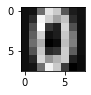

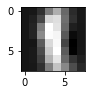

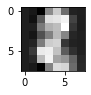

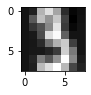

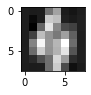

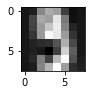

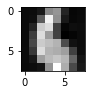

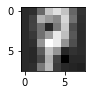

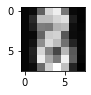

In [59]:
from matplotlib import pyplot

X_train = X_rebuilt

for i in range(9):  
    pyplot.subplot(330 + 1 + i)
    shape = (8,8)
    im = X_train[i].reshape(shape)
    pyplot.imshow(im, cmap=pyplot.get_cmap('gray'))
    pyplot.show()    

# Sparse PCA

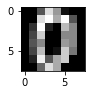

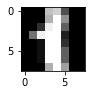

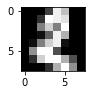

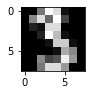

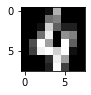

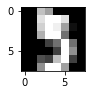

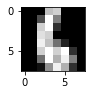

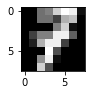

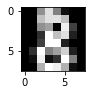

In [61]:
from matplotlib import pyplot

X_train = digits.data

for i in range(9):  
    pyplot.subplot(330 + 1 + i)
    shape = (8,8)
    im = X_train[i].reshape(shape)
    pyplot.imshow(im, cmap=pyplot.get_cmap('gray'))
    pyplot.show()    

In [60]:
from sklearn.decomposition import SparsePCA

spca = SparsePCA(n_components=36, alpha=0.1)
X_spca = spca.fit_transform(digits.data / 255)

print(spca.components_.shape)

(36, 64)


In [61]:
print(spca.explained_variance_ratio_)


AttributeError: 'SparsePCA' object has no attribute 'explained_variance_ratio_'

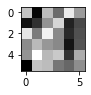

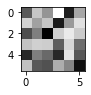

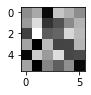

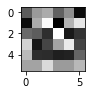

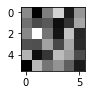

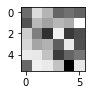

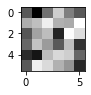

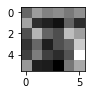

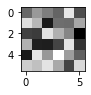

In [62]:
from matplotlib import pyplot

X_train = X_spca

for i in range(9):  
    pyplot.subplot(330 + 1 + i)
    shape = (6,6)
    im = X_train[i].reshape(shape)
    pyplot.imshow(im, cmap=pyplot.get_cmap('gray'))
    pyplot.show()    

In [63]:
Xs_rebuilt = (X_spca @ spca.components_) + spca.mean_

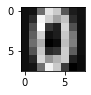

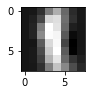

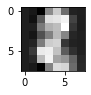

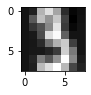

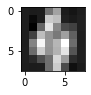

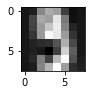

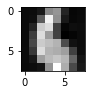

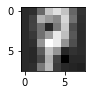

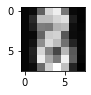

In [64]:
from matplotlib import pyplot

X_train = X_rebuilt

for i in range(9):  
    pyplot.subplot(330 + 1 + i)
    shape = (8,8)
    im = X_train[i].reshape(shape)
    pyplot.imshow(im, cmap=pyplot.get_cmap('gray'))
    pyplot.show()    

# Kernel PCA

In [65]:
from sklearn.datasets import make_circles

Xb, Yb = make_circles(n_samples=500, factor=0.1, noise=0.05)

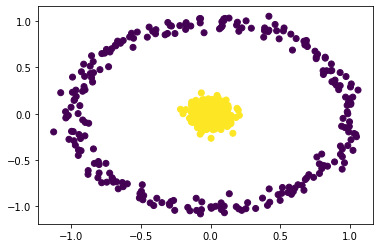

In [66]:
import matplotlib.pyplot as plt
plt.viridis()
plt.scatter(Xb[:, 0], Xb[:, 1], c=Yb)
plt.show()

In [67]:
from sklearn.decomposition import KernelPCA

kpca = KernelPCA(n_components=2, kernel='rbf', fit_inverse_transform=True, gamma=1.0)
X_kpca = kpca.fit_transform(Xb)

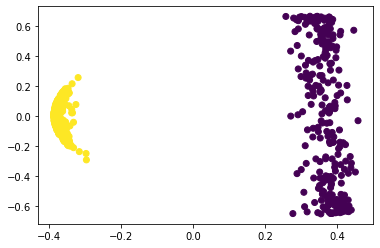

In [68]:
import matplotlib.pyplot as plt
plt.viridis()
plt.scatter(X_kpca[:, 0], X_kpca[:, 1], c=Yb)
plt.show()

# ICA - Independent Component Analysis

In [75]:
import numpy as np

from sklearn.datasets import fetch_openml


def zero_center(Xd):
    return Xd - np.mean(Xd, axis=0)

digits = fetch_openml("mnist_784")

X = zero_center(digits['data'].astype(np.float64))
np.random.shuffle(X)

D:\Backup\Dropbox\Jupyter\venv\lib\site-packages\ipykernel_launcher.py:12: UserWarning: you are shuffling a 'DataFrame' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  if sys.path[0] == "":


KeyError: 42938

In [ ]:
from sklearn.decomposition import FastICA

fastica = FastICA(n_components=256, max_iter=5000, random_state=1000)
fastica.fit(X)

# t-SNE - t-Distributed Stochastic Neighbor Embedding 

In [69]:
import numpy as np

from sklearn.datasets import load_digits

digits = load_digits()
X = digits['data'] / np.max(digits['data'])

In [70]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=20, random_state=1000, learning_rate=200, init='pca')
X_tsne = tsne.fit_transform(X)

D:\Backup\Dropbox\Jupyter\venv\lib\site-packages\sklearn\manifold\_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


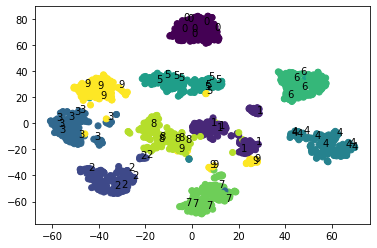

In [71]:
import matplotlib.pyplot as plt
plt.viridis()
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=digits.target)

for i in range(len(X_tsne)):
    if i % 25 == 0:
        plt.text(x=X_tsne[i][0]+0.3,y=X_tsne[i][1]+0.3,s=digits.target[i])

    
plt.show()

-67.05897